# PyQSPICE, Python Module for [Qorvo](https://www.qorvo.com)'s [QSPICE™](https://www.qorvo.com/design-hub/design-tools/interactive/qspice) <br/><br/>Quick Start / Example

## 1. Load Module

The entire PyQSPICE consists of a Python class **clsQSPICE**, let's load it as pqs.
...and load some standard modules those used in this example.

In [1]:
from PyQSPICE import clsQSPICE as pqs

import os
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 2. PyQSPICE Class Methods / Class Variables

There are some class methods and class variables those available without having class instances.
Mostly those are path names of QSPICE executable (.exe) and working directory information.

Let's move our working directory to "10_DC" under "tests".
> **NOTE:**
> Here, we don't want to move down to "tests/10_DC/tests/10_DC...." __every time we run this JupyterLab step__, so we have this "if" statement.

In [2]:
if not os.getcwd().rstrip().replace('/','\\').endswith(r'tests\10_DC'):
    pqs.chdir('tests/10_DC')
print(pqs.gpath)

{'cwd': 'C:\\Users\\mn080015\\OneDrive - Qorvo\\Documents\\vp\\Masashi\\PyQSPICE\\tests\\10_DC', 'home': 'C:\\Users\\mn080015', 'QUX': 'C:\\Users\\mn080015/QSPICE/QUX.exe', 'QSPICE64': 'C:\\Users\\mn080015/QSPICE/QSPICE64.exe'}


## 3. PyQSPICE Instance

By providing an **actual file name** or a **base file name (without file-extension/suffix)**, we can generate a PyQSPICE instnace.
* The "path" is a list of auto-generated target file names, based on the **file name** initiating this PyQSPICE instance.
* The "ts" is a list of **time stamp** of each target files.
* The "date" is a list of **modified date/time** of each target files.

> **NOTE:**
> The "ts" element is zero (0) for files not existing.  And "date" is empty for non-existing files.

In [3]:
run = pqs("UJ3N065080")
print(run.path)
print(run.ts)
print(run.date)

{'user': 'UJ3N065080', 'base': 'UJ3N065080', 'qsch': 'UJ3N065080.qsch', 'qraw': 'UJ3N065080.qraw', 'cir': 'UJ3N065080.cir'}
{'qsch': 1696704204.0, 'qraw': 1697208347.42511, 'cir': 1697208347.1637833}
{'qsch': datetime.datetime(2023, 10, 7, 14, 43, 24), 'qraw': datetime.datetime(2023, 10, 13, 10, 45, 47, 425110), 'cir': datetime.datetime(2023, 10, 13, 10, 45, 47, 163783)}


## 4. Generate a Netlist **(.cir)**

The **qsch2cir()** PyQSPICE method runs the QSPICE simulator to convert a **.qsch** schematic file into a **.cir** netlist file.

In [4]:
run.qsch2cir()
print(run.ts)
print(run.date)

{'qsch': 1696704204.0, 'qraw': 1697208347.42511, 'cir': 1697208382.4912722}
{'qsch': datetime.datetime(2023, 10, 7, 14, 43, 24), 'qraw': datetime.datetime(2023, 10, 13, 10, 45, 47, 425110), 'cir': datetime.datetime(2023, 10, 13, 10, 46, 22, 491272)}


## 5. Run QSPICE for a Result Data File **(.qraw)**

the **cir2qraw()** PyQSPICE method runs the QSPICE simulator to get your result **.qraw** file.

In [5]:
run.cir2qraw()
print(run.ts)
print(run.date)

{'qsch': 1696704204.0, 'qraw': 1697208386.0651138, 'cir': 1697208382.4912722}
{'qsch': datetime.datetime(2023, 10, 7, 14, 43, 24), 'qraw': datetime.datetime(2023, 10, 13, 10, 46, 26, 65114), 'cir': datetime.datetime(2023, 10, 13, 10, 46, 22, 491272)}


## 6. Load a Result Data File

The **LoadQRAW()** PyQSPICE method loads specified signal(s) information into Python memory as a Pandas DataFrame object.
This method reads all the signal names in the given **"list"**.

> **NOTE:**
> The PyQSPICE module identifies the first column of data based on the simulation result **.qraw** file.
> Such info is stored in **sim** variable.

In [6]:
df = run.LoadQRAW(["Id(J1)"])
print(df)
print(run.sim)

              V2        Id(J1)  Step
0       0.000000  1.160000e-12     0
1       0.002000  3.885333e-03     0
2       0.004001  7.770666e-03     0
3       0.006001  1.165600e-02     0
4       0.008002  1.554133e-02     0
...          ...           ...   ...
29995   9.991998  9.254473e+01     5
29996   9.993999  9.255042e+01     5
29997   9.995999  9.255612e+01     5
29998   9.998000  9.256181e+01     5
29999  10.000000  9.256751e+01     5

[30000 rows x 3 columns]
{'Nline': 4999, 'Nstep': 6, 'Type': 'DC Transfer Characteristic', 'Xlbl': 'V2', 'Xmin': 0.0, 'Xmax': 10.0, 'StepInfo': '.step param Vgs -8 2 2 \n'}


## 7. Plot

From this point, you can do your own operation on your simulation results.

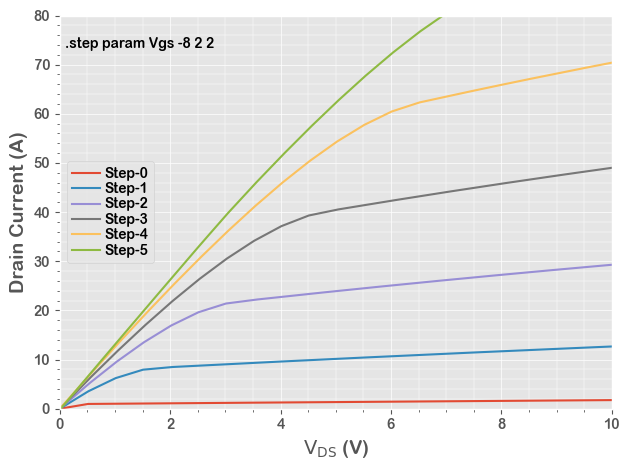

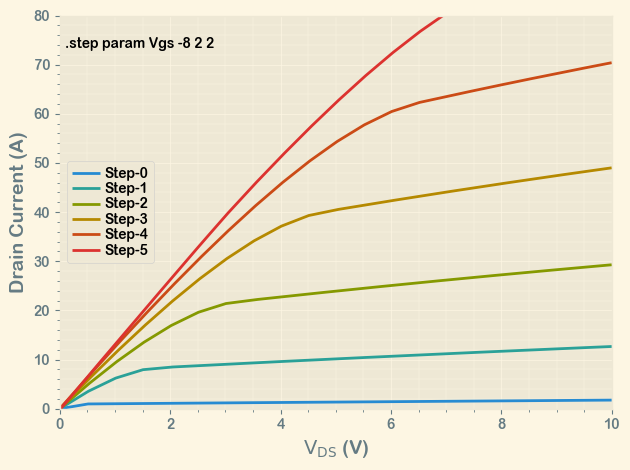

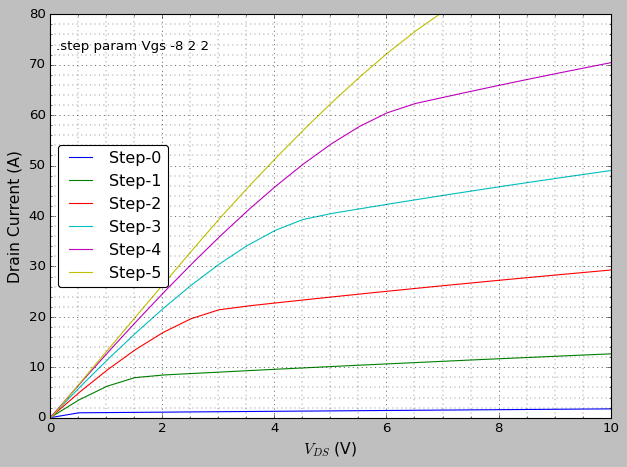

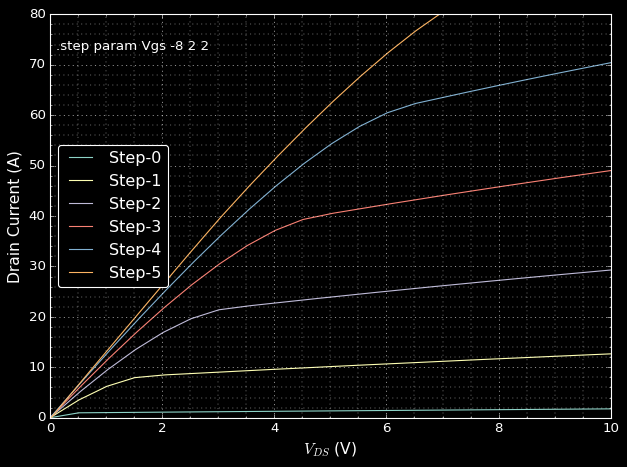

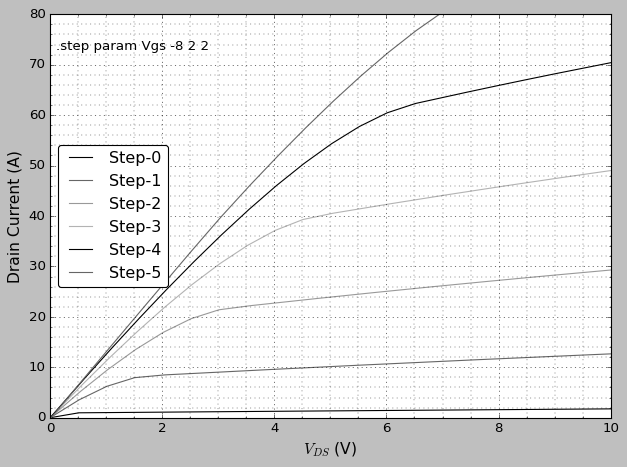

In [7]:
mpl.rcParams.update([['font.sans-serif', ["Arial Rounded MT Bold", 'Arial Unicode MS', 'Arial', 'sans-serif']], ["mathtext.default", "rm"], ["legend.labelspacing", 0.1], ["legend.columnspacing", 0.2], ["legend.handletextpad", 0.3], ['axes.formatter.useoffset', False], ['xtick.minor.visible', True], ['ytick.minor.visible', True], ['grid.linewidth', 1],["savefig.dpi", 300], ["axes.unicode_minus", False]])

plt.close('all')

#['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

for stl in ['ggplot', 'Solarize_Light2', 'classic', 'dark_background', 'grayscale']:
    plt.style.use(stl)

    fig, ax = plt.subplots(tight_layout=True)

    for i in range(run.sim['Nstep']):
        df[df.Step == i].plot(ax=ax, x=run.sim['Xlbl'],  y="Id(J1)", label="Step-" + str(i))

    ax.set_xlim(run.sim['Xmin'],run.sim['Xmax'])
    ax.set_ylim(0,80)
    ax.set_ylabel('Drain Current (A)', fontsize=14)
    ax.set_xlabel('$V_{DS}$ (V)', fontsize=14)
    ax.minorticks_on()

    ax.grid(which='major', linewidth="0.5")
    ax.grid(which='minor', linewidth="0.35")

    ax.text(0.1, 70, run.sim['StepInfo'])
    plt.legend(ncol=1, loc="center left",fancybox=True)

    plt.show()

    run.tstime(['png'])
    plt.savefig(run.path['png'], format='png', bbox_inches='tight')
    plt.close('all')

## 8. Clean-up

The **clean()** PyQSPICE method cleans up files generated by the script.

> **NOTE:**
> If you specify the schematic **.qsch** in your cleaning list, it deletes it **as you ordered with no warning**.

In [8]:
run.tstime(['png'])
print(run.ts)
print(run.date)
run.clean(['cir','qraw','png'])
print(run.ts)
print(run.date)

{'qsch': 1696704204.0, 'qraw': 1697208386.0651138, 'cir': 1697208382.4912722, 'png': 1697208396.8097184}
{'qsch': datetime.datetime(2023, 10, 7, 14, 43, 24), 'qraw': datetime.datetime(2023, 10, 13, 10, 46, 26, 65114), 'cir': datetime.datetime(2023, 10, 13, 10, 46, 22, 491272), 'png': datetime.datetime(2023, 10, 13, 10, 46, 36, 809718)}
{'qsch': 1696704204.0, 'qraw': 0, 'cir': 0, 'png': 0}
{'qsch': datetime.datetime(2023, 10, 7, 14, 43, 24)}
